<a href="https://colab.research.google.com/github/Zain-mahfoud94/Java-Core-Tutorial/blob/main/GP_Hyperparameter_Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Process Example

In [ ]:
#@title Setup
import numpy as np
import pylab as plt
plt.rcParams["figure.figsize"] = (20,10)

tmp = !pip list | grep ipywidgets
if len(tmp) == 0:
    !pip install ipywidgets
from ipywidgets import interact

def gen_data(ground_truth, n_samples, noise=0.5):
    X = np.random.uniform(0, 6, n_samples)
    y = ground_truth(X) + np.random.randn(*X.shape)*noise
    return X, y

np.random.seed(5)
ground_truth = lambda x: x * np.sin(x*2)
X, y = gen_data(ground_truth, n_samples=11)

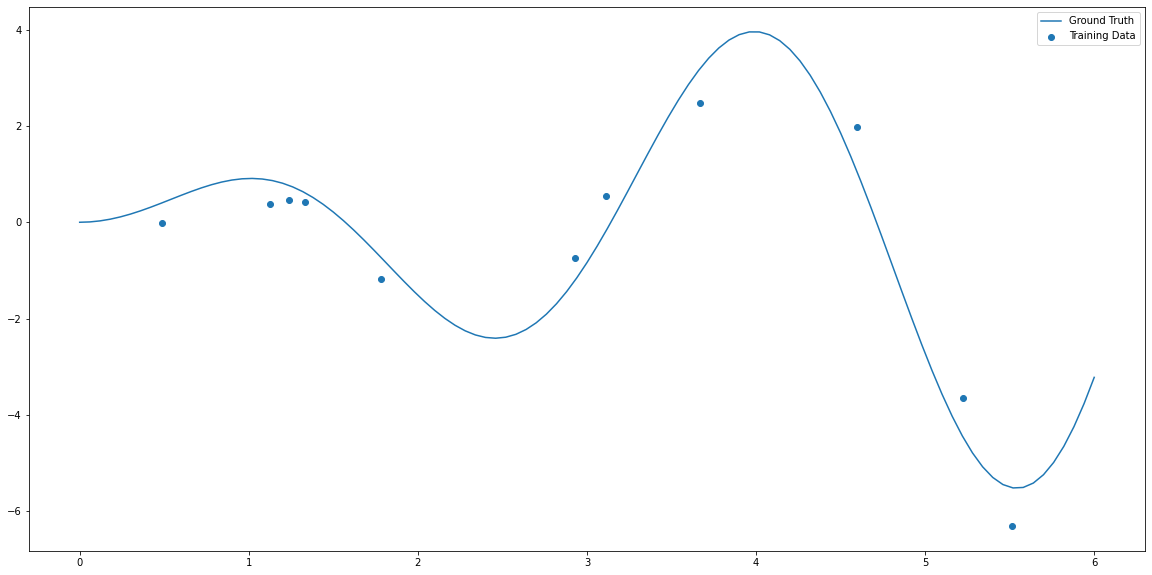

In [ ]:
#@title Plot Data and Ground Truth
axis = np.linspace(0, 6, 101)

plt.plot(axis, ground_truth(axis), label='Ground Truth')
plt.scatter(X, y, label='Training Data')
plt.legend()
plt.show()

In [ ]:
#@title Gaussian Kernel
class GaussianKernel:
    """Gaussian kernel from Eq. 6.63."""
    def __init__(self, theta0=1, theta1=1, theta2=0, theta3=0):
        self.theta0 = theta0
        self.theta1 = theta1
        self.theta2 = theta2
        self.theta3 = theta3

    def __call__(self, x, y):
        return self.theta0 * np.exp(- (self.theta1 / 2) * (x - y)**2) + self.theta2 + self.theta3 * x*y

class ExponentialKernel:
    """Exponential kernel from Eq. 6.56."""
    def __init__(self, theta=1):
        self.theta = theta

    def __call__(self, x, y):
        return np.exp(- self.theta * np.abs(x - y))

In [ ]:
#@title Plot Kernel
def plot_contour(kernel=['gaussian_kernel', 'exponential_kernel'], theta0=1, theta1=1, theta2=0, theta3=0, theta=1):
    axis = np.linspace(-4, 4, 101)
    gaussian_kernel = GaussianKernel(theta0=theta0, theta1=theta1, theta2=theta2, theta3=theta3)
    exponential_kernel = ExponentialKernel(theta=theta)
    point = 0

    fig = plt.figure(figsize=(13, 5))
    if kernel == 'gaussian_kernel':
        sim = gaussian_kernel(point, axis)

        eq_str = r'$\theta_0 \exp \{- \theta_1 / 2 \| x_n - x_m\|^2\} + \theta_2 + \theta_3\, x_n x_m$'
        plt.title('Gaussian Kernel (Eq. 6.63) \n' + eq_str, pad=10)
        s = '\n'.join((
            r"$\theta_0 = " + "{:.1f}$".format(theta0),
            r"$\theta_1 = " + "{:.1f}$".format(theta1),
            r"$\theta_2 = " + "{:.1f}$".format(theta2),
            r"$\theta_3 = " + "{:.1f}$".format(theta3),
        ))

    elif kernel=='exponential_kernel':
        plt.title('Exponential Kernel \n  $\exp(-\\theta |x - x\'|)$', pad=10)
        s = '\n'.join((
            r"$\theta = " + "{}$".format(theta),
        ))
        sim = exponential_kernel(point, axis)


    plt.scatter(point, 0, marker='x')
    plt.plot(axis, sim)
    plt.text(0.9, 1, s, horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, bbox=dict(facecolor='lightgray', alpha=1))
    axis = np.linspace(-4, 4, 101)

    plt.show()
interact(plot_contour, theta0=(0, 5, .1), theta1=(0, 5, .1), theta2=(0, 5, .1), theta3=(0, 100, .1), theta=(0, 5, .1))

interactive(children=(Dropdown(description='kernel', options=('gaussian_kernel', 'exponential_kernel'), value=…

<function __main__.plot_contour>

In [ ]:
#@title Plot Priors
def plot_priors(kernel=['gaussian_kernel', 'exponential_kernel'], theta0=1, theta1=1, theta2=0, theta3=0, theta=1):
    """Sample random functions that are induced by a specific kernel."""
    n_random_samples = 3
    axis = np.linspace(0, 6, 301)
    fig = plt.figure(figsize=(13, 5))


    if kernel=='gaussian_kernel':
        eq_str = r'$\theta_0 \exp \{- \theta_1 / 2 \| x_n - x_m\|^2\} + \theta_2 + \theta_3\, x_n x_m$'
        plt.title('Gaussian Kernel (Eq. 6.63) \n' + eq_str, pad=10)
        s = '\n'.join((
            r"$\theta_0 = " + "{}$".format(theta0),
            r"$\theta_1 = " + "{}$".format(theta1),
            r"$\theta_2 = " + "{}$".format(theta2),
            r"$\theta_3 = " + "{}$".format(theta3),
        ))
        plt.text(1., .8, s, horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, bbox=dict(facecolor='lightgray', alpha=1))
        kernel = GaussianKernel(theta0=theta0, theta1=theta1, theta2=theta2, theta3=theta3)


    if kernel == 'exponential_kernel':
        plt.title('Exponential Kernel (Eq. 6.56)')
        plt.title('Expnential Kernel \n  $\exp(-\\theta |x - x\'|)$', pad=10)
        s = '\n'.join((
            r"$\theta = " + "{}$".format(theta),
        ))
        plt.text(0.8, 1, s, horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, bbox=dict(facecolor='lightgray', alpha=1))
        kernel = ExponentialKernel(theta=theta)


    np.random.seed(1)
    mu = np.zeros_like(axis)
    cov = np.array([kernel(x, axis) for x in axis])

    prior_samples = np.random.multivariate_normal(mu, cov, size=n_random_samples, check_valid='ignore')
    plt.plot(axis, prior_samples.T)

    plt.show()
interact(plot_priors, theta0=(0, 5, .1), theta1=(0, 64, .1), theta2=(0, 5, .1), theta3=(0, 100, .1), theta=(0, 5, .1))

interactive(children=(Dropdown(description='kernel', options=('gaussian_kernel', 'exponential_kernel'), value=…

<function __main__.plot_priors>

In [ ]:
#@title GP Predictions
def predict_conditional(inp, kernel, noise=.2):
    """Determine the parameters of the joint distribution (see Eq. 6.65)"""
    # Compute covariance matrix with noise (Eq. 6.62)
    cov_mat = np.array([kernel(x, X) for x in X]) + np.eye(len(X)) * noise
    k = kernel(inp, X) # bottom-left and top-right
    c = kernel(inp, inp) + noise  # bottom-right

    # Determine the parameters of the conditional Gaussian distribution (Eq. 6.66 and 6.67)
    mean = k @ np.linalg.inv(cov_mat) @ y
    var = c - k @ np.linalg.inv(cov_mat) @ k
    return mean , var

def plot_predict_conditional(kernel=['gaussian_kernel', 'exponential_kernel'], noise=.2, theta0=1, theta1=1, theta2=0, theta3=0, theta=1):
    fig = plt.figure(figsize=(13, 5))
    axis = np.linspace(min(X)-2, max(X)+2, 101)

    if kernel == 'gaussian_kernel':
        # eq_str = r'$\theta_0 \exp \{- \theta_1 / 2 \| x_n - x_m\|^2\} + \theta_2 + \theta_3\, x_n x_m$'
        eq_str = r'$m\left(\mathbf{x}_{N+1}\right) =\mathbf{k}^{\mathrm{T}} \mathbf{C}_{N}^{-1} \mathbf{t}'
        eq_str += r'\quad\quad'
        eq_str += r'\sigma^{2}\left(\mathbf{x}_{N+1}\right) =c-\mathbf{k}^{\mathrm{T}} \mathbf{C}_{N}^{-1} \mathbf{k}$'
        plt.title('Gaussian Kernel (Eq. 6.63) \n ' + eq_str, pad=10)
        s = '\n'.join((
            r"$\theta_0 = " + "{}$".format(theta0),
            r"$\theta_1 = " + "{}$".format(theta1),
            r"$\theta_2 = " + "{}$".format(theta2),
            r"$\theta_3 = " + "{}$".format(theta3),
        ))
        plt.text(1., .8, s, horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, bbox=dict(facecolor='lightgray', alpha=1))
        kernel = GaussianKernel(theta0=theta0, theta1=theta1, theta2=theta2, theta3=theta3)

    elif kernel == 'exponential_kernel':
        plt.title('Exponential Kernel \n  $\exp(-\\theta |x - x\'|)$', pad=10)
        s = '\n'.join((
            r"$\theta = " + "{}$".format(theta),
        ))
        plt.text(0.8, 1, s, horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, bbox=dict(facecolor='lightgray', alpha=1))
        kernel = ExponentialKernel(theta=theta)

    preds = np.c_[[predict_conditional(x, kernel, noise=noise) for x in axis]]
    mean_pred = preds[:, 0]
    var_pred = preds[:, 1]
    plt.plot(axis, mean_pred)
    plt.fill_between(axis, mean_pred - np.sqrt(var_pred), mean_pred + np.sqrt(var_pred), alpha=.3)
    plt.scatter(X, y)
    plt.show()
interact(plot_predict_conditional, noise=(0.0, 1, 0.01), theta0=(0, 5, .1), theta1=(0, 5, .1), theta2=(0, 5, .1), theta3=(0, 5, .1), theta=(0, 5, .1))

interactive(children=(Dropdown(description='kernel', options=('gaussian_kernel', 'exponential_kernel'), value=…

<function __main__.plot_predict_conditional>